# Analysis For Microsoft Movie Studio 

![example](images/director_shot.jpeg)

## Overview
Microsoft is launching a new film studio yet needs information on what kinds of motion pictures to deliver. They need to break down film industry patterns utilizing information from film data sets and ticket deals records. The discoveries can be utilized to direct their choices on film types, financial plan distribution, and promoting systems (conference of a fruitful studio). The proposal is to focus on effective types and consider specialty markets for development.


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Since creating a movie studio is already a big movie without knowing what movie to create. Following are the queries:
What movies are more popular?
What studio does most amount of sales and profit?
What studio is the best rated in the market place?

## Data Understanding

The four IMDb datasets, imdb.title.basics, imdb.title.ratings, bom.movie_gross, and tn.movie_budgets, all provide details on the names of films as well as their box office gross earnings, ratings, and budgets. They can be used to examine patterns and elements that affect a movie's likelihood of success or failure. The IMDb rating, the production budget, the genre, and the box office take-home pay are the analysis's primary target factors. Consider these issues:

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_path1 = "./zippedData/imdb.title.basics.csv.gz"

In [3]:
file_path2 = "./zippedData/imdb.title.ratings.csv.gz"

In [4]:
file_path3 = "./zippedData/bom.movie_gross.csv.gz"

In [5]:
file_path4 = "./zippedData/tn.movie_budgets.csv.gz"

# Reading the CSV files

In [6]:
itb = pd.read_csv(file_path1)

In [7]:
itr = pd.read_csv(file_path2)

In [8]:
bmg = pd.read_csv(file_path3)

In [9]:
tmb = pd.read_csv(file_path4)

# IMDB Title File

In [10]:
#general peak at the data
itb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
itb.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [12]:
#quick observation of the data type information
itb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
# No of rows and columns
itb.shape

(146144, 6)

In [14]:
# Checking the number of nulls
itb.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [15]:
#since there is some null values lets look at what percent of the data is null
itb_null_percent = round((itb.isnull().sum() / len(itb)) * 100,2).astype(str) + '%'

In [16]:
print(itb_null_percent)

tconst               0.0%
primary_title        0.0%
original_title      0.01%
start_year           0.0%
runtime_minutes    21.72%
genres               3.7%
dtype: object


# IMDB Rating

In [17]:
#quick look at the data
itr.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
itr.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [19]:
#observation of the data types and more dive into the details of the data
itr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
#No of rows and columns
itr.shape

(73856, 3)

In [21]:
#checking if there is any null values
itr.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [22]:
#since there is no null values there is no need of calculation of percentage

# Movie Gross File

In [23]:
#general observation of the data
bmg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
bmg.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [25]:
#gathering data and its type information
bmg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
#Number of rows and columns
bmg.shape

(3387, 5)

In [27]:
#checking for null
bmg.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
#since there is some null values lets look at what percent of the data in the columns are null
bmg_null_percent = round((bmg.isnull().sum() / len(bmg)) * 100,2).astype(str) + '%'

In [29]:
print(bmg_null_percent)

title               0.0%
studio             0.15%
domestic_gross     0.83%
foreign_gross     39.86%
year                0.0%
dtype: object


# Movie Budget

In [30]:
#general observation
tmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
tmb.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [32]:
#data info
tmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
#No of rows and columns for this data
tmb.shape

(5782, 6)

In [34]:
#checking for null values
tmb.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [35]:
#Since there is no null values so no further investigation needed

# 

## Data Preparation

Here i have created the tables by merging individual tables to IMDB title. Moreover, following things has been done:
1. Columns which were not the part of our analysis or anything irrelevant were eliminated.
2. Missing and duplicate datas are dealt with in this section.
3. Data types and name has been changed for some columns.
4. Outliers has been scanned.
5. Inconsistencies in the data has been looked for.

***

In [36]:
#Binding the Data Frames
#IMDB title and IMDB rating to be merged on a common column they share
itb_itr= pd.merge(itb,itr, on='tconst')
itb_itr.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [37]:
#checking for nulls in the binded frame
itb_itr.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [38]:
#since there is some null values lets calculate the percent of the values that are null
itb_itr_null_percent = round((itb_itr.isnull().sum()/len(itb_itr)*100),2).astype(str) + "%"
itb_itr_null_percent

tconst               0.0%
primary_title        0.0%
original_title       0.0%
start_year           0.0%
runtime_minutes    10.32%
genres              1.09%
averagerating        0.0%
numvotes             0.0%
dtype: object

In [39]:
#Binding the IMDB title and Movie Budget
tmb = tmb.rename(columns={"movie": "primary_title"})
itb_tmb= pd.merge(itb, tmb[['primary_title','production_budget','release_date','domestic_gross','worldwide_gross']], left_on=['primary_title', 'original_title'], right_on=['primary_title', 'primary_title'], how='inner')

itb_tmb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,release_date,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","$45,000,000","Dec 31, 2012",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy","$20,000,000","Aug 18, 1995","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,"$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery","$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [40]:
#checking for number of null values
itb_tmb.isnull().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      462
genres                63
production_budget      0
release_date           0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [41]:
#calculating the percent of null values
itb_tmb_null_percent = round((itb_tmb.isnull().sum()/len(itb_tmb)*100),2).astype(str) + "%"
itb_tmb_null_percent

tconst                 0.0%
primary_title          0.0%
original_title         0.0%
start_year             0.0%
runtime_minutes      13.41%
genres                1.83%
production_budget      0.0%
release_date           0.0%
domestic_gross         0.0%
worldwide_gross        0.0%
dtype: object

In [42]:
#Binding IMDB title and Movie Gross data frame
bmg = bmg.rename(columns={"title": "primary_title"})
itb_bmg = pd.merge(itb, bmg[['primary_title', 'studio', 'year', 'domestic_gross', 'foreign_gross']], left_on=['primary_title', 'original_title'], right_on=['primary_title', 'primary_title'], how='inner')
itb_bmg.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,year,domestic_gross,foreign_gross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Relbig.,2016,1100000.0,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,2012,744000.0,8000000
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,2012,744000.0,8000000
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,2012,744000.0,8000000
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,2012,744000.0,8000000


In [43]:
#Checking null in the binded frame
itb_bmg.isnull().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes    164
genres              36
studio               3
year                 0
domestic_gross      20
foreign_gross      979
dtype: int64

In [44]:
#calculating the percent of null values in the individual columns
itb_bmg_null_percent = round((itb_bmg.isnull().sum()/len(itb_bmg)*100), 2).astype(str)+"%"
itb_bmg_null_percent

tconst               0.0%
primary_title        0.0%
original_title       0.0%
start_year           0.0%
runtime_minutes     6.01%
genres              1.32%
studio              0.11%
year                 0.0%
domestic_gross      0.73%
foreign_gross      35.85%
dtype: object

In [45]:
#Column 'runtime_minute' has been removed from the data as it is not a part of the scope for our analysis.
itb_itr.drop('runtime_minutes', axis=1, inplace=True)

In [48]:
#Dropping the missing data
itb_itr.dropna(inplace=True)

In [49]:
itb_itr.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


In [50]:
#Same as above removing the run time column
itb_tmb.drop('runtime_minutes', axis=1, inplace=True)

In [ ]:
#Dropping the missing data as it is viable in this case considering the size of the dataset
itb_tmb.dropna(inplace=True)

In [51]:
itb_tmb.head()

,tconst,primary_title,original_title,start_year,genres,production_budget,release_date,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy","$45,000,000","Dec 31, 2012",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,"Action,Adventure,Fantasy","$20,000,000","Aug 18, 1995","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,NaN,"$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery","$200,000","Jun 19, 2015","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [56]:
itb_tmb.shape

(3444, 9)

In [58]:
#getting rid of the columns not required for analysis
itb_bmg.drop('runtime_minutes', axis=1, inplace=True)
itb_bmg.drop('foreign_gross', axis=1, inplace=True)
#handling missing data
itb_bmg.dropna(inplace=True)

In [60]:
#general peek at the data
itb_bmg.head()

,tconst,primary_title,original_title,start_year,genres,studio,year,domestic_gross
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",Relbig.,2016,1100000.0
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0
2,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0
3,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0
4,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0


In [62]:
#itb_bmg from the dataset only including the studios which has done over 70 movie production.
num_studios = itb_bmg['studio'].nunique()
abv_sev = itb_bmg['studio'].value_counts()  #this is used to count studio frequency
ext_abv_sev = abv_sev[abv_sev > 70].index.tolist() #to extract only studios with frequency > 70
itb_bmg_new = itb_bmg[itb_bmg['studio'].isin(ext_abv_sev)] 

In [63]:
#new data set
itb_bmg_new.head() 

,tconst,primary_title,original_title,start_year,genres,studio,year,domestic_gross
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0
2,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0
3,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0
4,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0
5,tt5389486,On the Road,On the Road,2015,Documentary,IFC,2012,744000.0


In [64]:
itb_bmg_new.dtypes

tconst             object
primary_title      object
original_title     object
start_year          int64
genres             object
studio             object
year                int64
domestic_gross    float64
dtype: object

# Merging the datasets for further analysis

In [159]:
#the data set itb and bmg has been merged below
profit_std = itb_bmg_new.merge(itb_tmb, on=['tconst', 'tconst'], how='inner', suffixes=('_bmg', '_tmb'))

In [160]:
# Find and drop any duplicated columns
duplicate_cols = set([col for col in profit_std.columns if profit_std.columns.duplicated().sum() > 0])
profit_std.drop(duplicate_cols, axis=1, inplace=True)

In [161]:
print(profit_std.shape)

(979, 16)


In [162]:
profit_std.head()

,tconst,primary_title_bmg,original_title_bmg,start_year_bmg,genres_bmg,studio,year,domestic_gross_bmg,primary_title_tmb,original_title_tmb,start_year_tmb,genres_tmb,production_budget,release_date,domestic_gross_tmb,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",IFC,2012,744000.0,On the Road,On the Road,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
1,tt2404548,On the Road,On the Road,2011,Drama,IFC,2012,744000.0,On the Road,On the Road,2011,Drama,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
2,tt3872966,On the Road,On the Road,2013,Documentary,IFC,2012,744000.0,On the Road,On the Road,2013,Documentary,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
3,tt4339118,On the Road,On the Road,2014,Drama,IFC,2012,744000.0,On the Road,On the Road,2014,Drama,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"
4,tt5389486,On the Road,On the Road,2015,Documentary,IFC,2012,744000.0,On the Road,On the Road,2015,Documentary,"$25,000,000","Mar 22, 2013","$720,828","$9,313,302"


In [163]:
profit_std = profit_std.drop(['start_year_bmg', 'genres_bmg', 'domestic_gross_bmg', 'primary_title_tmb', 'original_title_tmb', 'start_year_tmb', ],  axis=1)

In [164]:
profit_std['tconst'].duplicated().sum()

21

In [165]:
#dropping duplicate values
profit_std.drop_duplicates(subset='tconst', inplace=True)

In [166]:
print(profit_std.shape)

(958, 10)


In [167]:
#Merging average rating column in profit_std on the basis of tconst

In [168]:
profit_std = profit_std.merge(itb_itr[['tconst', 'averagerating']], on='tconst', how='inner')

In [169]:
#To remove duplicates in movies
profit_std.drop_duplicates(['original_title_bmg'], inplace=True)

In [170]:
profit_std

,tconst,primary_title_bmg,original_title_bmg,studio,year,genres_tmb,production_budget,release_date,domestic_gross_tmb,worldwide_gross,averagerating
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302",6.1
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama","$91,000,000","Dec 25, 2013","$58,236,838","$187,861,183",7.3
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama","$28,000,000","Sep 19, 2014","$26,017,685","$62,108,587",6.5
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi","$215,000,000","Jun 12, 2015","$652,270,625","$1,648,854,864",7.0
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family","$30,000,000","Apr 13, 2012","$44,338,224","$54,052,249",5.1
...,...,...,...,...,...,...,...,...,...,...,...
848,tt6347308,A Quiet Place,A Quiet Place,Par.,2018,Documentary,"$17,000,000","Apr 6, 2018","$188,024,361","$334,522,294",6.6
850,tt6802308,The 15:17 to Paris,The 15:17 to Paris,WB,2018,"Biography,Drama,Thriller","$30,000,000","Feb 9, 2018","$36,276,286","$56,096,200",5.2
851,tt6966692,Green Book,Green Book,Uni.,2018,"Biography,Comedy,Drama","$23,000,000","Nov 16, 2018","$85,080,171","$322,034,439",8.3
852,tt7040874,A Simple Favor,A Simple Favor,LGF,2018,"Comedy,Crime,Drama","$20,000,000","Sep 14, 2018","$53,548,586","$97,628,717",6.9


In [171]:
#Finalised data ready for analysis

In [172]:
profit_std['original_title_bmg'].shape

(744,)

In [173]:
#calculating number of duplicates
num_dup = profit_std.duplicated(['original_title_bmg']).sum()
print( num_dup)

0


In [174]:
profit_std.head()

,tconst,primary_title_bmg,original_title_bmg,studio,year,genres_tmb,production_budget,release_date,domestic_gross_tmb,worldwide_gross,averagerating
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance","$25,000,000","Mar 22, 2013","$720,828","$9,313,302",6.1
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama","$91,000,000","Dec 25, 2013","$58,236,838","$187,861,183",7.3
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama","$28,000,000","Sep 19, 2014","$26,017,685","$62,108,587",6.5
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi","$215,000,000","Jun 12, 2015","$652,270,625","$1,648,854,864",7.0
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family","$30,000,000","Apr 13, 2012","$44,338,224","$54,052,249",5.1


## Data Modeling

To demonstrate a method for analysing and modelling the data related to film studios and their worldwide gross revenue, the code was ran on 744 films. The data are first grouped by studio, the worldwode are added, the data are then converted to a DataFrame and sorted by total worldwode in descending order. The outcomes are then shown using a horizontal bar chart. A pivot table is then created to analyse worldwide gross by studio, and the results are then displayed as a bar chart. The code is then iterated to remove data from before 2000. The code also demonstrates how to sum up data globally and organise data by rating to generate a table. These decisions are wise since they contribute to the purpose of making strategic business decisions and planning in the film industry, it is crucial to identify the most successful and high-caliber studios and to track their performance over time.

In [175]:
# This is done to change certain columns type from object to float
profit_std['production_budget'] = profit_std['production_budget'].str.replace('$', '').str.replace(',', '')
profit_std['domestic_gross_tmb'] = profit_std['domestic_gross_tmb'].str.replace('$', '').str.replace(',', '')
profit_std['worldwide_gross'] = profit_std['worldwide_gross'].str.replace('$', '').str.replace(',', '')
profit_std['production_budget'] = profit_std['production_budget'].astype(float)
profit_std['domestic_gross_tmb'] = profit_std['domestic_gross_tmb'].astype(float)
profit_std['worldwide_gross'] = profit_std['worldwide_gross'].astype(float)

print(profit_std['release_date'].dtype)


object


In [176]:
profit_std['release_date'] = pd.to_datetime(profit_std['release_date'])
print(profit_std['release_date'].dtype)

datetime64[ns]


In [177]:
# Grouping studios and sum of total revenue
studio_total = profit_std.groupby('studio')['worldwide_gross'].sum()

# Converting the resulting Series to a DataFrame and add a column for the studio names
studio_df = pd.DataFrame(studio_total).reset_index()
studio_df.columns = ['studio', 'total_worldwide_gross']

# Sorted the table by total world wide gross revenue gross in descending order
studio_df = studio_df.sort_values('total_worldwide_gross', ascending=False)
studio_df.head(30)

,studio,total_worldwide_gross
0,BV,3.074100e+10
11,Uni.,2.568339e+10
2,Fox,2.561531e+10
12,WB,2.196405e+10
10,Sony,1.641810e+10
7,Par.,1.373311e+10
5,LGF,6.599606e+09
13,Wein.,2.561024e+09
3,FoxS,2.142183e+09
9,SPC,7.127967e+08


In [178]:
studio_df = studio_df.reset_index(drop=True)
studio_df.index = studio_df.index + 1

# High performer Studio In Terms of Revenue

In [182]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

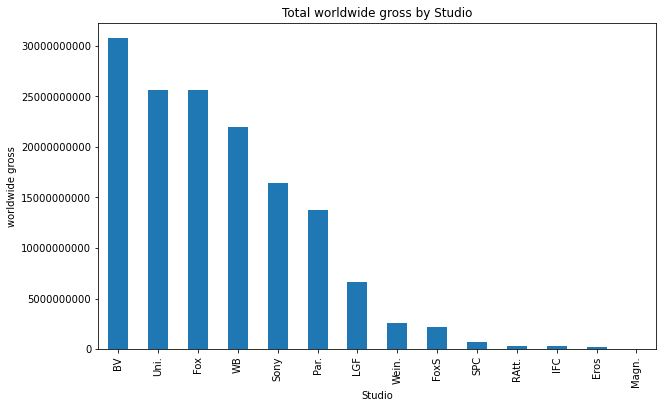

In [183]:
revenue_by_studio = profit_std.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)
ax = revenue_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Total worldwide gross by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('worldwide gross')
fmt = ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.yaxis.set_major_formatter(fmt)
ax.yaxis.get_major_formatter().set_useLocale(True)
ax.ticklabel_format(axis='y', style='plain')
plt.show()


# Highest Profit Studios

In [184]:
profit_std.head()

,tconst,primary_title_bmg,original_title_bmg,studio,year,genres_tmb,production_budget,release_date,domestic_gross_tmb,worldwide_gross,averagerating
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance",25000000.0,2013-03-22,720828.0,9.313302e+06,6.1
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,2013-12-25,58236838.0,1.878612e+08,7.3
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,2014-09-19,26017685.0,6.210859e+07,6.5
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,2015-06-12,652270625.0,1.648855e+09,7.0
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,2012-04-13,44338224.0,5.405225e+07,5.1


In [185]:
profit_std['profit'] = profit_std['worldwide_gross'] - profit_std['production_budget'].replace(1e10, 'billions')
profit_std.head()

,tconst,primary_title_bmg,original_title_bmg,studio,year,genres_tmb,production_budget,release_date,domestic_gross_tmb,worldwide_gross,averagerating,profit
0,tt0337692,On the Road,On the Road,IFC,2012,"Adventure,Drama,Romance",25000000.0,2013-03-22,720828.0,9.313302e+06,6.1,-1.568670e+07
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,2013-12-25,58236838.0,1.878612e+08,7.3,9.686118e+07
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,2014-09-19,26017685.0,6.210859e+07,6.5,3.410859e+07
5,tt0369610,Jurassic World,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,2015-06-12,652270625.0,1.648855e+09,7.0,1.433855e+09
6,tt0383010,The Three Stooges,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,2012-04-13,44338224.0,5.405225e+07,5.1,2.405225e+07


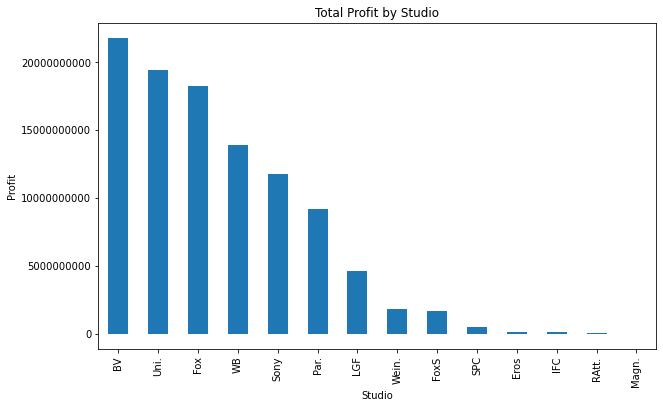

In [186]:
profit_by_studio = profit_std.groupby('studio')['profit'].sum().sort_values(ascending=False)
ax = profit_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Total Profit by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Profit')
fmt = ticker.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.yaxis.set_major_formatter(fmt)
ax.yaxis.get_major_formatter().set_useLocale(True)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

# Movie Genre Analysis

In this section, i have analysed what is the most popular genre interms of popularity and profitability.

In [215]:
movie_gen = profit_std.groupby('genres_tmb').count()

In [221]:
movie_gen.sort_values(['tconst'], ascending = False)

,tconst,primary_title_bmg,original_title_bmg,studio,year,production_budget,release_date,domestic_gross_tmb,worldwide_gross,averagerating,profit
genres_tmb,,,,,,,,,,,
"Adventure,Animation,Comedy",50,50,50,50,50,50,50,50,50,50,50
"Action,Adventure,Sci-Fi",38,38,38,38,38,38,38,38,38,38,38
"Comedy,Drama,Romance",30,30,30,30,30,30,30,30,30,30,30
Comedy,29,29,29,29,29,29,29,29,29,29,29
"Comedy,Drama",28,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...
"Biography,Drama,Fantasy",1,1,1,1,1,1,1,1,1,1,1
"Biography,Comedy,Crime",1,1,1,1,1,1,1,1,1,1,1
"Animation,Comedy,Drama",1,1,1,1,1,1,1,1,1,1,1


#Adventure, Animation, Comedy, Action, Sci-Fi, Drama, Romance are the best genre to go during the beginning phase as it will help set the foundation.

In [233]:
movie_profits = profit_std.groupby('genres_tmb')['profit'].mean()

In [234]:
movie_profits

genres_tmb
Action                        7.018988e+06
Action,Adventure,Animation    4.426590e+08
Action,Adventure,Biography    1.938158e+08
Action,Adventure,Comedy       3.980851e+08
Action,Adventure,Crime        1.461543e+08
                                  ...     
Horror,Sci-Fi,Thriller        1.415212e+08
Horror,Thriller               3.218020e+07
Mystery,Sci-Fi,Thriller       2.079727e+08
Mystery,Thriller              2.194618e+08
Romance,Sci-Fi,Thriller       7.673132e+07
Name: profit, Length: 156, dtype: float64

In [237]:
type(movie_profits)

pandas.core.series.Series

In [242]:
mv_profits = movie_profits.to_frame()

In [243]:
mv_profits

,profit
genres_tmb,
Action,7.018988e+06
"Action,Adventure,Animation",4.426590e+08
"Action,Adventure,Biography",1.938158e+08
"Action,Adventure,Comedy",3.980851e+08
"Action,Adventure,Crime",1.461543e+08
...,...
"Horror,Sci-Fi,Thriller",1.415212e+08
"Horror,Thriller",3.218020e+07
"Mystery,Sci-Fi,Thriller",2.079727e+08


In [245]:
mv_profits.sort_values('profit', ascending = False)

,profit
genres_tmb,
"Adventure,Drama,Sport",1.122470e+09
"Adventure,Drama,Sci-Fi",5.243254e+08
"Comedy,Mystery",5.064643e+08
"Action,Adventure,Sci-Fi",5.009137e+08
"Action,Adventure,Animation",4.426590e+08
...,...
"Drama,Family,Music",-1.021486e+07
"Adventure,Drama,Romance",-1.568670e+07
"Documentary,War",-1.717451e+07


Looking at the figure the movie genre for best yield of profit would be Adventure, Drama, Sport, Sci-Fi, Comedy, Mystery. So combination of any of these will yeild in good amount of profit as per the analysis.

# Studios Average Rating

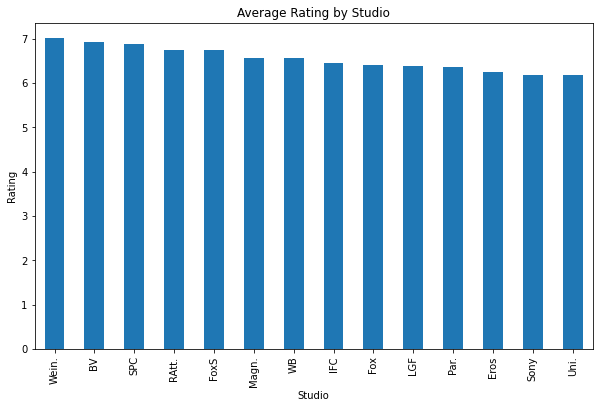

In [187]:
rating_by_studio = profit_std.groupby('studio')['averagerating'].mean().sort_values(ascending=False)
ax = rating_by_studio.plot(kind='bar', figsize=(10,6))
ax.set_title('Average Rating by Studio')
ax.set_xlabel('Studio')
ax.set_ylabel('Rating')
plt.show()

## Evaluation
I would advise that a successful studio should be consulted in order to develop a new one for Microsoft after evaluating the studio's performance. The quality of the studio's production, as shown by movie ratings, as well as the money and profits made from their films, were among the major measures used to evaluate the studio's performance. By using this strategy, the business would be able to produce movies of a high calibre while also generating a sizable amount of income. At the same time, for the genre the popular and high profit genres are Adventture, Sci-Fi, Drama, Comedy, Mystery, Sports.

## Conclusions
I would suggested that Microsoft should consult Buena Vista as the best studio based on the analysis done. Buena Vista is well-positioned to offer helpful insights and expertise in making high-quality films that generate significant returns thanks to the highest revenue and profit achieved and the second-highest average rating per movie of 6.9.

744 movies made up the dataset for the analysis, which was cleaned to produce reliable results. It is important to note, nevertheless, that using larger datasets might have led to even more exact conclusions and suggestions. In order to pinpoint the kinds of movies that would be consistent with Microsoft's goals and objectives are  popular and high profit genres are Adventture, Sci-Fi, Drama, Comedy, Mystery, Sports.

In conclusion, it is advised that Microsoft consult Buena Vista for their knowledge and experience in creating high-quality films that yield significant returns based on the conclusions of this investigation.